# **Bidirectional Associative Memory (BAM)**

---
### Problem Statement

Build a simple model BAM to predict pattern mapping of the following character:

<img src="./problem_pattern.png" alt="image" width="500" height="150">

---

### BAM Algorithm

ilustration:

<img src="./bidirectional_concept.png" alt="image" width="500" height="300">

---


### **Code Implementation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Convert input and target images to numpy arrays

In [2]:
X = np.array([[-1, -1, 1, 1, 1, -1, -1, 
               -1, 1, -1, -1, -1, 1, -1, 
               1, -1, -1, -1, -1, -1, 1, 
               1, -1, -1, -1, -1, -1, 1, 
               1, -1, -1, -1, -1, -1, 1, 
               1, 1, 1, 1, 1, 1, 1, 
               1, -1, -1, -1, -1, -1, 1, 
               1, -1, -1, -1, -1, -1, 1, 
               1, -1, -1, -1, -1, -1, 1],
              [1,1,1,1,1,-1,-1,
               1,-1,-1,-1,-1,1,-1,
               1,-1,-1,-1,-1,-1,1,
               1,-1,-1,-1,-1,1,-1,
               1,1,1,1,1,-1,-1,
               1,-1,-1,-1,-1,1,-1,
               1,-1,-1,-1,-1,-1,1,
               1,-1,-1,-1,-1,1,-1,
               1,1,1,1,1,-1,-1],
               [1,-1,-1,-1,-1,-1,1,
                1,-1,-1,-1,-1,-1,1,
                1,-1,-1,-1,-1,-1,1,
                1,-1,-1,-1,-1,-1,1,
                1,1,1,1,1,1,1,
                1,-1,-1,-1,-1,-1,1,
                1,-1,-1,-1,-1,-1,1,
                1,-1,-1,-1,-1,-1,1,
                1,-1,-1,-1,-1,-1,1,]])


Y = np.array([[-1, 1, -1,
               1, -1, 1,
               1, 1, 1,
               1, -1, 1,
               1, -1, 1],
               [1,1,-1,
                1,-1,1,
                1,1,-1,
                1,-1,1,
                1,1,-1],
                [1,-1,1,
                 1,-1,1,
                 1,1,1,
                 1,-1,1,
                 1,-1,1,]])


print("X = ", X)
print("\nY = ", Y)
print("\n\nDimensions of X: ", X.shape)
print("Dimensions of Y: ", Y.shape)

X =  [[-1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1
  -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
   1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1]
 [ 1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1
  -1 -1  1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
   1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1]
 [ 1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1
  -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
   1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1]]

Y =  [[-1  1 -1  1 -1  1  1  1  1  1 -1  1  1 -1  1]
 [ 1  1 -1  1 -1  1  1  1 -1  1 -1  1  1  1 -1]
 [ 1 -1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1]]


Dimensions of X:  (3, 63)
Dimensions of Y:  (3, 15)


Create visualize function 

In [3]:
def visualize(matrix, a, b, c):
    # Reshape data menjadi citra biner 9x7
    X = matrix.reshape(a, b, c)
    # Plot setiap elemen data sebagai citra biner
    plt.figure(figsize=(5, 3))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(X[i], cmap='binary')
        plt.title("Data {}".format(i + 1))

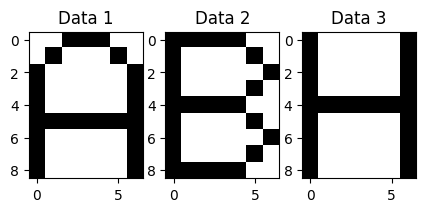

In [4]:
visualize(X, 3, 9, 7)

Hitung nilai *weight* dengan cara mengalikan transpose matrix input dengan matrix target.

<img src="./index.png" alt="image" width="200" height="100">

In [5]:
def weightValue(X, Y):
    return np.dot(X.T, Y)

weight = weightValue(X, Y)
print('W = ', weight, end = "")

print("\n\nDimensions of Weight Matrix: ",weight.shape)

W =  [[ 3 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1 -1]
 [ 1  1 -1 -1  1 -1 -1 -1 -3 -1  1 -1 -1  3 -3]
 [-1  3 -3  1 -1  1  1  1 -1  1 -1  1  1  1 -1]
 [-1  3 -3  1 -1  1  1  1 -1  1 -1  1  1  1 -1]
 [-1  3 -3  1 -1  1  1  1 -1  1 -1  1  1  1 -1]
 [-1 -1  1 -3  3 -3 -3 -3 -1 -3  3 -3 -3  1 -1]
 [ 1 -3  3 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1]
 [ 3 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1 -1]
 [-3  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1]
 [-1 -1  1 -3  3 -3 -3 -3 -1 -3  3 -3 -3  1 -1]
 [-1 -1  1 -3  3 -3 -3 -3 -1 -3  3 -3 -3  1 -1]
 [-1 -1  1 -3  3 -3 -3 -3 -1 -3  3 -3 -3  1 -1]
 [-1  3 -3  1 -1  1  1  1 -1  1 -1  1  1  1 -1]
 [ 1 -3  3 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1]
 [ 1  1 -1  3 -3  3  3  3  1  3 -3  3  3 -1  1]
 [-1 -1  1 -3  3 -3 -3 -3 -1 -3  3 -3 -3  1 -1]
 [-1 -1  1 -3  3 -3 -3 -3 -1 -3  3 -3 -3  1 -1]
 [-1 -1  1 -3  3 -3 -3 -3 -1 -3  3 -3 -3  1 -1]
 [-1 -1  1 -3  3 -3 -3 -3 -1 -3  3 -3 -3  1 -1]
 [-1 -1  1 -3  3 -3 -3 -3 -1 -3  3 -3 -3  1 -1]
 [ 1  1 -1  3 -3  3  3  3  1  3 -3 

Create Activation Function (Bipolar Activation Function)

In [6]:
def ForwardBipolarActivation(matrix, weight):
    matrix[matrix > 0] = 1
    matrix[matrix <= 0] = -1
    return np.array(matrix)

def BackwardBipolarActivation(matrix, weight):
    matrix[matrix >= 0] = 1
    matrix[matrix < 0] = -1
    return np.array(matrix)

### **Forward Testing**

----
- We perform the following operation on all the Y (set B) matrices and verify if our result matches with the corresponding set A (X) matrices. 

    $
        Y(i) * weight^T = X_i
    $
----

In [7]:
def forward(Y, weight): 
  x = np.dot(Y, weight.T) 
  return ForwardBipolarActivation(x, weight)


weight * Y0 =  [ 1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1
  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1]  = X0
Mean Squared Error (MSE): 0.6984126984126984

weight * Y1 =  [ 1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1  1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
  1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1]  = X1
Mean Squared Error (MSE): 0.0

weight * Y2 =  [ 1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1]  = X2
Mean Squared Error (MSE): 0.0


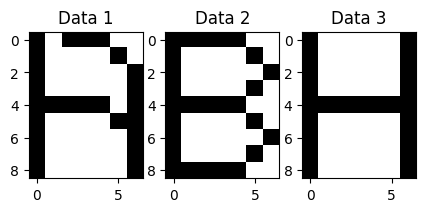

In [8]:
m, n = X.shape
forward_input = forward(Y, weight)

for i in range (m):
    print("\nweight * Y{} = ".format(i), forward_input[i])
    mse = ((X[i] - forward_input[i]) ** 2).mean()

    print("Mean Squared Error (MSE):", mse)

visualize(forward_input, 3, 9, 7)

----
### **Backward Testing**
- We perform the following operation on all the X (set A) matrices and verify if our result matches with the corresponding set B (Y) matrices. 

    $
        weight^T * X_i = Y_i
    $
----

In [9]:
def backward(X, weight): 
  Y = np.dot(weight.T, X) 
  return BackwardBipolarActivation(Y, weight)


weight * X0 =  [-1  1 -1  1 -1  1  1  1  1  1 -1  1  1 -1  1]  = Y0
Mean Squared Error (MSE): 0.0

weight * X1 =  [ 1  1 -1  1 -1  1  1  1 -1  1 -1  1  1  1 -1]  = Y1
Mean Squared Error (MSE): 0.0

weight * X2 =  [ 1 -1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1]  = Y2
Mean Squared Error (MSE): 0.0


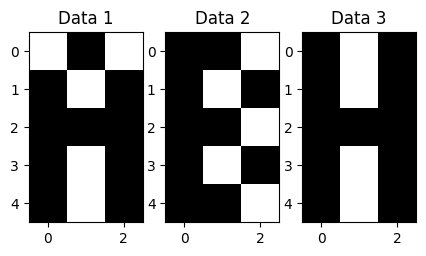

In [10]:
backward_output = []

for i in range (m):
    tmp = backward(X[i], weight)
    print("\nweight * X{} = ".format(i), tmp, " = Y{}".format(i))
    backward_output.append(tmp)

    mse = ((Y[i] - tmp) ** 2).mean()

    print("Mean Squared Error (MSE):", mse)

# change type to numpy array
list_of_lists = np.array([arr.tolist() for arr in backward_output])

visualize(list_of_lists,3,5,3)